<a href="https://colab.research.google.com/github/Abroh2005/colabnotebook/blob/main/Neuralnetwork_handwritten_numbers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

Hand written numbers dataset-xtrain
Corresponding numbers-ytrain

In [45]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [46]:
len(xtrain),len(xtest)

(60000, 10000)

In [47]:
xtrain[0].shape

(28, 28)

In [48]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

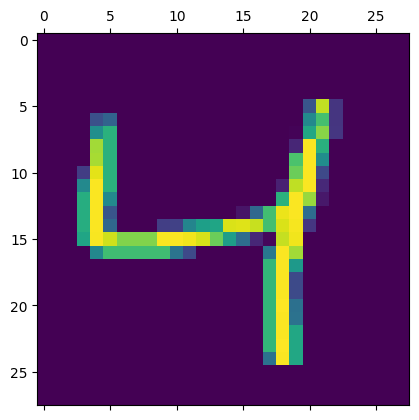

In [49]:
plt.matshow(xtrain[2])

In [50]:
ytrain[2]

4

Flatten Training Data Set

In [51]:
xtrain=xtrain/255
xtest=xtest/255

In [52]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28)
xtrain_flattened.shape

(60000, 784)

In [53]:
xtest_flattened=xtest.reshape(len(xtest),28*28)
xtest_flattened.shape

(10000, 784)

Neural network

In [54]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [55]:
tr=model.fit(xtrain_flattened, ytrain, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4690 - accuracy: 0.8772
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9156
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9212
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9258
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9274
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9280
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9288
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2531 - accuracy: 0.9296
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [66]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9274


[0.26795902848243713, 0.9273999929428101]

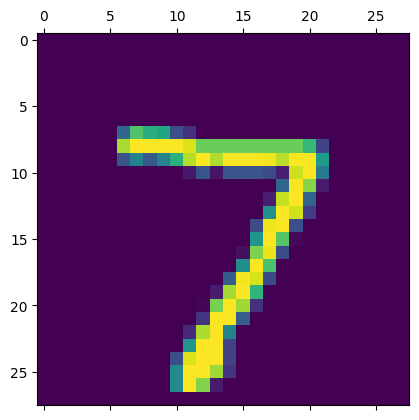

In [57]:
plt.matshow(xtest[0])

In [58]:
ypredicted=model.predict(xtest_flattened)
ypredicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.15679856e-03, 2.44518428e-09, 5.50508499e-03, 9.72755313e-01,
       1.20639033e-03, 1.08388856e-01, 3.30452465e-09, 9.99773920e-01,
       8.35886747e-02, 6.57551944e-01], dtype=float32)

In [59]:
np.argmax(ypredicted[0])

7

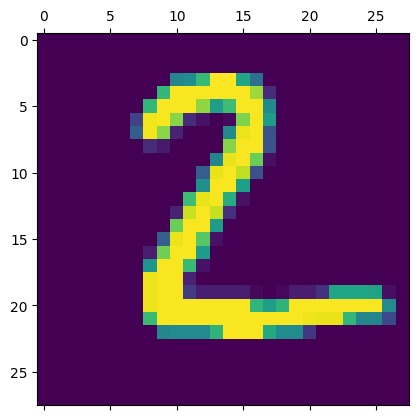

In [60]:
plt.matshow(xtest[1])

In [61]:
ypredicted[1]

array([2.60294616e-01, 4.70894668e-03, 9.99915719e-01, 5.84147312e-02,
       2.46184475e-12, 8.68849814e-01, 9.71658051e-01, 4.95190516e-17,
       1.14028245e-01, 1.79608949e-14], dtype=float32)

In [62]:
np.argmax(ypredicted[0])

2

In [63]:
ypredicted_labels=[np.argmax(i) for i in ypredicted]

In [64]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypredicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    5,   14,    2,    1,    0],
       [   0, 1112,    4,    2,    0,    1,    4,    2,   10,    0],
       [   4,    7,  939,   14,    8,    3,   14,    9,   31,    3],
       [   2,    0,   22,  918,    1,   25,    5,    8,   24,    5],
       [   1,    1,    7,    2,  920,    0,   12,    4,   11,   24],
       [   8,    2,    3,   35,    9,  770,   20,    7,   35,    3],
       [   6,    3,    8,    1,    7,    6,  923,    1,    3,    0],
       [   1,    7,   27,    6,    8,    1,    0,  939,    3,   36],
       [   5,    7,    7,   17,    8,   16,   11,    7,  891,    5],
       [   8,    8,    2,    9,   35,    6,    0,   18,   15,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

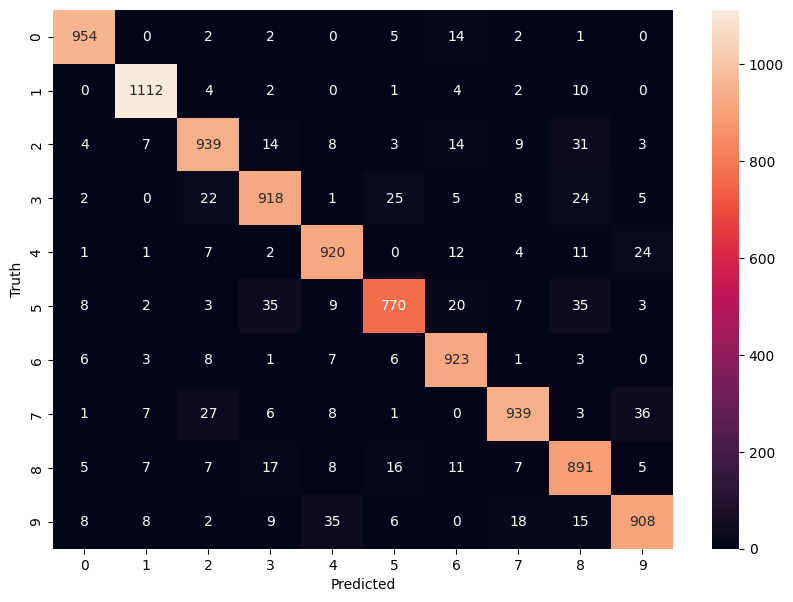

In [65]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Diagonals are correct and elements not in doigonal means errors

Adding hidden layer

In [102]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tr=model.fit(xtrain_flattened, ytrain, epochs=14)

Epoch 1/14
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2718 - accuracy: 0.9219
Epoch 2/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1249 - accuracy: 0.9635
Epoch 3/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9741
Epoch 4/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9834
Epoch 6/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 7/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 8/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 9/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 10/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

In [103]:
model.evaluate(xtest_flattened,ytest)


313/313 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9764


[0.09573735296726227, 0.9764000177383423]

In [104]:
ypredicted=model.predict(xtest_flattened)

313/313 [==============================] - 1s 2ms/step


In [105]:
ypredicted_labels=[np.argmax(i) for i in ypredicted]

In [106]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypredicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    0,    0,    3,    1,    3,    0],
       [   0, 1123,    5,    0,    0,    1,    4,    1,    1,    0],
       [   2,    2, 1009,    4,    1,    0,    5,    6,    2,    1],
       [   1,    0,    6,  991,    0,    2,    0,    4,    3,    3],
       [   0,    0,    7,    1,  955,    0,    5,    3,    0,   11],
       [   2,    0,    0,   26,    1,  849,    5,    1,    7,    1],
       [   3,    3,    1,    1,    2,    1,  946,    1,    0,    0],
       [   1,    4,    9,    1,    0,    0,    0, 1007,    5,    1],
       [   1,    0,    5,    8,    1,    1,    3,    3,  951,    1],
       [   2,    3,    0,   14,    8,    1,    0,   15,    4,  962]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

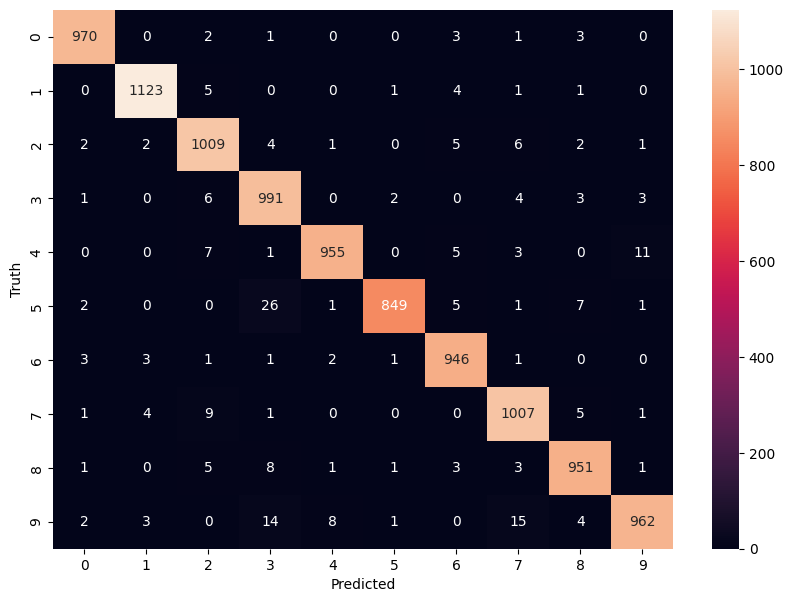

In [107]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")